# **Classifying Grocery Items into 19 Categories!!**

Importing neeeded libraries.

In [1]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow_hub as hub
from tensorflow.keras import regularizers
import pandas as pd
from IPython.display import HTML

In [2]:
#Generating Data

image_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,validation_split=0.2)

img_data_train=image_generator.flow_from_directory('../input/MLChallenge/ML/Train',target_size=(224,224),subset='training')

img_data_val=image_generator.flow_from_directory('../input/MLChallenge/ML/Train',target_size=(224,224),subset='validation')



Found 892 images belonging to 19 classes.
Found 215 images belonging to 19 classes.


In [3]:
#Display Different Classes
img_data_train.class_indices

{'Bakery': 0,
 'Battery': 1,
 'Cleanser': 2,
 'Confectional products': 3,
 'Dairy Products': 4,
 'Frozen Food': 5,
 'Fruits': 6,
 'Ice Cream': 7,
 'Instant': 8,
 'Personal care': 9,
 'Poultry products': 10,
 'Snacks': 11,
 'beverages': 12,
 'canned': 13,
 'care': 14,
 'cereals': 15,
 'chips': 16,
 'chocolates': 17,
 'vegetables': 18}

In [4]:
class_names=['Bakery','Battery','Cleanser','Confectional products','Dairy Products','Frozen Food','Fruits','Ice Cream','Instant',
            'Personal care','Poultry products','Snacks','beverages','canned','care','cereals','chips','chocolates','vegetables']
print(len(class_names))

19


In [5]:
#Funcn to view and analayze data

def display(img_batch,label_batch):
    plt.figure(figsize=(10,9))
    plt.subplots_adjust(wspace=0.7,hspace=0.7)
    for i in range(30):
        plt.subplot(6,5,i+1)
        plt.imshow(img_batch[i])
        plt.title(class_names[np.argmax(label_batch[i])])

In [6]:
for sample_batch,sample_label in img_data_train:
    print(sample_batch.shape)
    print(sample_label.shape)
    break

(32, 224, 224, 3)
(32, 19)


# Displaying a sample of the Training Data.

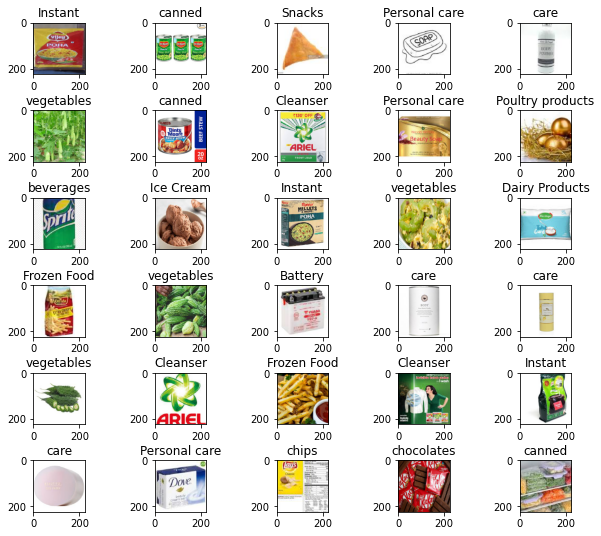

In [7]:
display(sample_batch,sample_label)

First Model is ResNet50....feature vector obtained from tensorflow hub.

In [8]:
feature_extract_url="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer=hub.KerasLayer(str(feature_extract_url),input_shape=(224,224,3))

feature_extraction_layer.trainable=False

steps_per_epoch=np.ceil(img_data_train.samples/img_data_train.batch_size)

# Training Data is less...Model may overfit 

So can use early stopping ...to get good accuracy on Validation set.

Using Learning rate decay helps optimization and also helps generalize result.

Will also use Dropout.

In [9]:
#EARLY STOPPING

early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=15)


#LEARNING RATE DECAY
lr_schedule=tf.keras.optimizers.schedules.InverseTimeDecay(
  0.0001,
  decay_steps=steps_per_epoch*500,
  decay_rate=1,
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

In [10]:
model=tf.keras.Sequential([
feature_extraction_layer,
keras.layers.Dropout(0.5),
# keras.layers.Dense(800,activation='relu',kernel_regularizer=regularizers.l2(0.009)),
# # keras.layers.Dropout(0.6),  
# keras.layers.Dense(800,activation='relu',kernel_regularizer=regularizers.l2(0.00001)),


tf.keras.layers.Dense(img_data_train.num_classes,activation='softmax')
])

model.compile(optimizer=get_optimizer(),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
steps=np.ceil(img_data_train.samples/img_data_train.batch_size)

history=model.fit(img_data_train,epochs=102,validation_data=img_data_val,steps_per_epoch=steps,verbose=0)

Second Model is Efficientnet

In [12]:
feature_extract_url2="https://tfhub.dev/google/efficientnet/b1/feature-vector/1"

    
feature_extraction_layer2=hub.KerasLayer(str(feature_extract_url2),input_shape=(224,224,3))

feature_extraction_layer2.trainable=False

model2=tf.keras.Sequential([
feature_extraction_layer2,
keras.layers.Dropout(0.3),
# keras.layers.Dense(19,activation='relu',kernel_regularizer=regularizers.l2(0.009)),
# # keras.layers.Dropout(0.6),  
# keras.layers.Dense(800,activation='relu',kernel_regularizer=regularizers.l2(0.00001)),


tf.keras.layers.Dense(img_data_train.num_classes,activation='softmax',kernel_regularizer=regularizers.l2(0.009))
])

model2.compile(optimizer=get_optimizer(),loss='categorical_crossentropy',metrics=['accuracy'])



history2=model2.fit(img_data_train,epochs=105,validation_data=img_data_val,steps_per_epoch=steps,verbose=0)


# Further 2 models are also built on ResNet50..

ResNet200 and Inception Net were also tested but due to limited data they lead to heavy overfitting and dont generalize well over validation set.


In [13]:
feature_extract_url3="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer3=hub.KerasLayer(str(feature_extract_url3),input_shape=(224,224,3))

feature_extraction_layer3.trainable=False

model3=tf.keras.Sequential([
feature_extraction_layer3,
keras.layers.Dropout(0.5),
    

tf.keras.layers.Dense(img_data_train.num_classes,activation='softmax')
])

model3.compile(optimizer=get_optimizer(),loss='categorical_crossentropy',metrics=['accuracy'])



history3=model3.fit(img_data_train,epochs=150,validation_data=img_data_val,steps_per_epoch=steps,verbose=0)


In [14]:
feature_extract_url4="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"

    
feature_extraction_layer4=hub.KerasLayer(str(feature_extract_url4),input_shape=(224,224,3))

feature_extraction_layer4.trainable=False

model4=tf.keras.Sequential([
feature_extraction_layer4,
keras.layers.Dropout(0.5),


tf.keras.layers.Dense(img_data_train.num_classes,activation='softmax')
])

model4.compile(optimizer=get_optimizer(),loss='categorical_crossentropy',metrics=['accuracy'])



history4=model4.fit(img_data_train,epochs=200,validation_data=img_data_val,steps_per_epoch=steps,verbose=0)


# Plotting Accuracy and Loss helps better visualize and analyize Training.

Helps make better hyperparameter tuning decisions.

(0.5, 1.1)

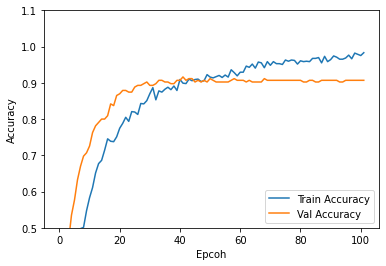

In [15]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.xlabel('Epcoh')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5,1.1])

(0.0, 5.0)

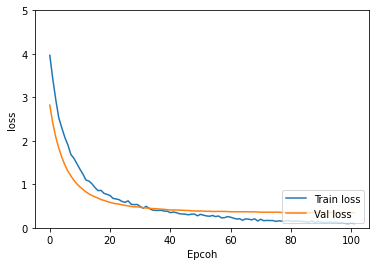

In [16]:
plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Val loss')
plt.xlabel('Epcoh')
plt.ylabel('loss')
plt.legend(loc='lower right')
plt.ylim([0,5])

# Models shows accuracy near 93%

Averaging their predictions on test images should result in better predictions.

In [17]:
model.evaluate(img_data_val)
model2.evaluate(img_data_val)
model3.evaluate(img_data_val)
model4.evaluate(img_data_val)

7/7 [==============================] - 0s 61ms/step - loss: 0.2972 - accuracy: 0.9395


[0.29717323184013367, 0.9395349025726318]

In [18]:
#Generating test data to get predictions

test_generator=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

test_data=test_generator.flow_from_directory('../input/MLChallenge/ML',classes=['Test'],class_mode=None,shuffle=False,target_size=(224,224))

Found 271 images belonging to 1 classes.


In [19]:
predictions1=model.predict(test_data)
predictions2=model2.predict(test_data)
predictions3=model3.predict(test_data)
predictions4=model4.predict(test_data)

predictions=(predictions1+predictions2+predictions3+predictions4)/4




In [20]:
#Making sure predictions stored as per need.
predictions.shape

(271, 19)

# ****Making Predictions Human Friendly :D****

In [21]:
prediction_class_index=np.argmax(predictions,axis=-1)


In [22]:
#Storing Predicted class name in a list

predicted_class_name=[]
for i in prediction_class_index:
    predicted_class_name.append(class_names[i])
    

In [23]:
#Storing predictins in DataFrame to generate csv

img_ids=test_data.filenames
df=pd.DataFrame(data=img_ids,columns=['ID'])
df['Class']=predicted_class_name

df=df.replace('Test/','',regex=True)
df=df.replace('.jpg','',regex=True)

In [24]:
df.to_csv('submission.csv',index=False)
def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='submission.csv')


In [25]:
df

,ID,Class
0,100,Battery
1,101,Battery
2,102,Battery
3,103,Battery
4,104,Battery
...,...,...
266,977,Ice Cream
267,978,Ice Cream
268,979,Ice Cream
269,980,Ice Cream
